In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
archivo_final = '../CSV/df_demo_expanded.csv'

In [15]:
df_demo_expanded = pd.read_csv(archivo_final)

C:\Users\Gema\AppData\Local\Temp\ipykernel_26452\1524190418.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_demo_expanded = pd.read_csv(archivo_final)


In [23]:
# Encontrar el valor mínimo de 'total_tenure_months'
min_tenure = df_demo_expanded['total_tenure_months'].min()

print(f"El valor más pequeño en 'total_tenure_months' es: {min_tenure} meses")

El valor más pequeño en 'total_tenure_months' es: 57.0 meses


In [30]:
# Asegurarnos de que 'total_tenure_months' es numérica
df_demo_expanded['total_tenure_months'] = pd.to_numeric(
    df_demo_expanded['total_tenure_months'], errors='coerce'
)

# Crear segmentos de antigüedad en meses
# Ajustamos los bins para que empiecen desde 57 meses (el valor más pequeño)
bins = [57, 72, 84, df_demo_expanded['total_tenure_months'].max()]  
labels = ['Intermedios (57-72 meses)', 'Veteranos (de 73 meses a 83 meses)' , 'Super Veteranos (+ de 84 meses)']

# Asegúrate de que las etiquetas sean una menos que los límites
df_demo_expanded['tenure_segment'] = pd.cut(
    df_demo_expanded['total_tenure_months'], bins=bins, labels=labels, right=False
)

# Calcular métricas clave por segmento y grupo
segment_analysis = df_demo_expanded.groupby(['tenure_segment', 'Variation']).agg(
    avg_bal=('bal', 'mean'),
    avg_num_accts=('num_accts', 'mean'),
    count=('client_id', 'size')
).reset_index()

# Mostrar los resultados
print(segment_analysis)

                       tenure_segment Variation        avg_bal  avg_num_accts  \
0           Intermedios (57-72 meses)   control  120622.687241       2.482759   
1           Intermedios (57-72 meses)      test  187122.637813       2.375000   
2  Veteranos (de 73 meses a 83 meses)   control  127420.404969       2.201258   
3  Veteranos (de 73 meses a 83 meses)      test  131793.062784       2.244318   
4     Super Veteranos (+ de 84 meses)   control  150338.842795       2.260037   
5     Super Veteranos (+ de 84 meses)      test  149029.914058       2.249804   

   count  
0     29  
1     32  
2    159  
3    176  
4  23339  
5  26753  


C:\Users\Gema\AppData\Local\Temp\ipykernel_26452\1858951270.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  segment_analysis = df_demo_expanded.groupby(['tenure_segment', 'Variation']).agg(


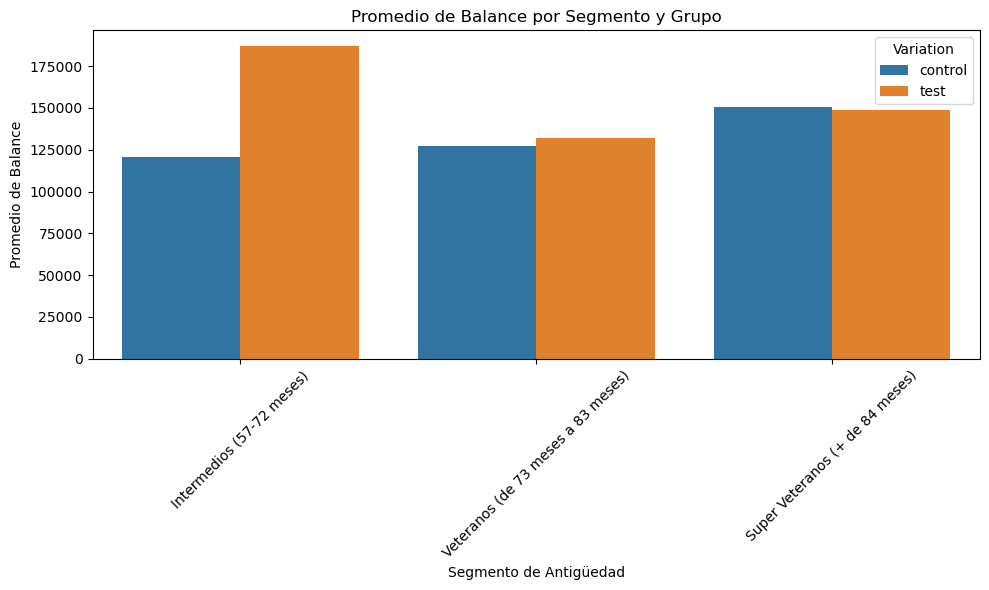

In [38]:
# Gráfico de barras para 'avg_bal' por segmento y grupo
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='tenure_segment', y='avg_bal', hue='Variation')
plt.title('Promedio de Balance por Segmento y Grupo')
plt.xlabel('Segmento de Antigüedad')
plt.ylabel('Promedio de Balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

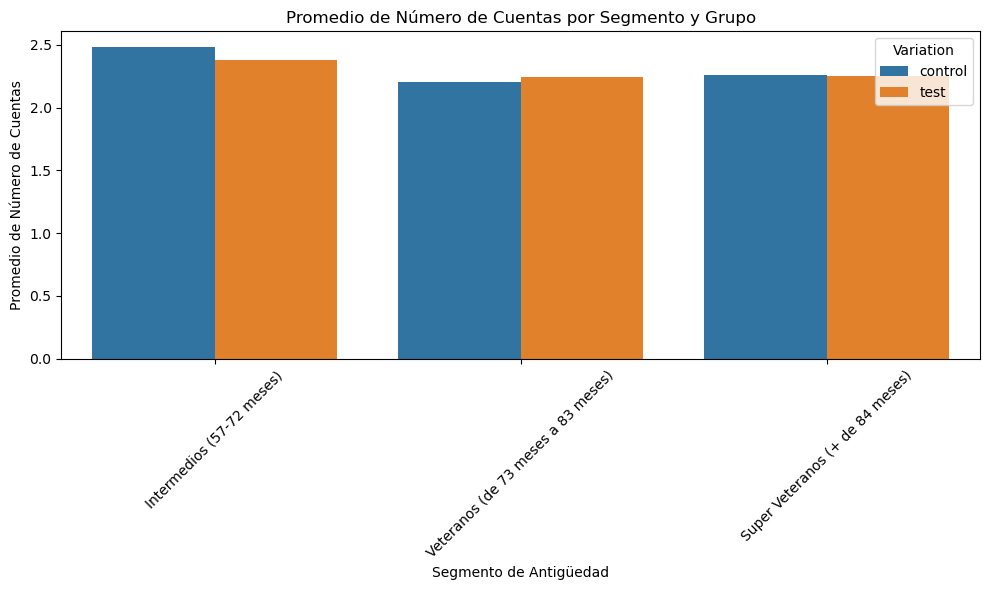

In [39]:
# Gráfico de barras para 'avg_num_accts' por segmento y grupo
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='tenure_segment', y='avg_num_accts', hue='Variation')
plt.title('Promedio de Número de Cuentas por Segmento y Grupo')
plt.xlabel('Segmento de Antigüedad')
plt.ylabel('Promedio de Número de Cuentas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


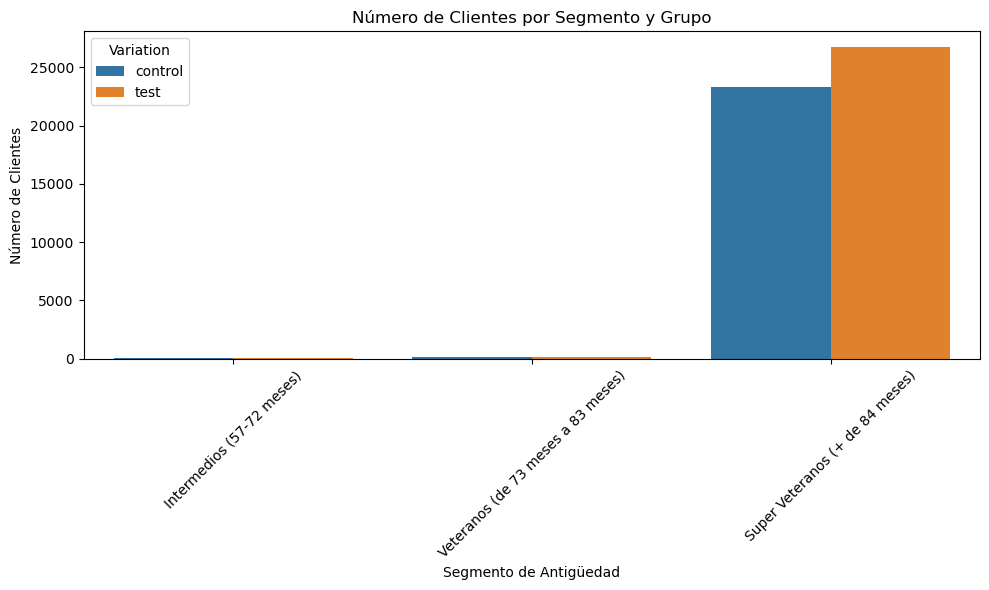

In [34]:
# Gráfico de barras para 'count' (número de clientes) por segmento y grupo
plt.figure(figsize=(10, 6))
sns.barplot(data=segment_analysis, x='tenure_segment', y='count', hue='Variation')
plt.title('Número de Clientes por Segmento y Grupo')
plt.xlabel('Segmento de Antigüedad')
plt.ylabel('Número de Clientes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


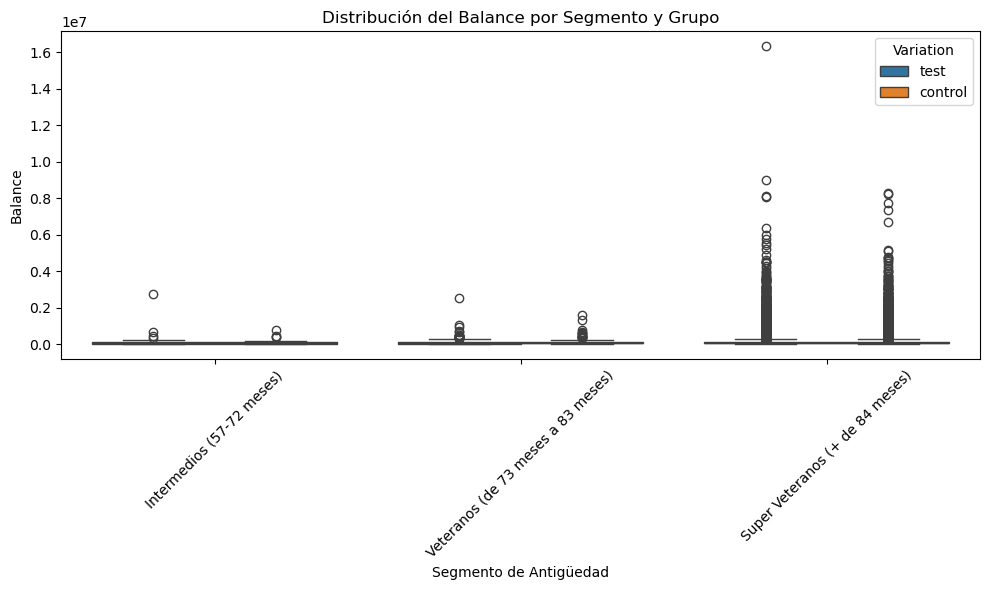

In [35]:
# Boxplot para comparar la distribución del balance entre los grupos por segmento
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_demo_expanded, x='tenure_segment', y='bal', hue='Variation')
plt.title('Distribución del Balance por Segmento y Grupo')
plt.xlabel('Segmento de Antigüedad')
plt.ylabel('Balance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


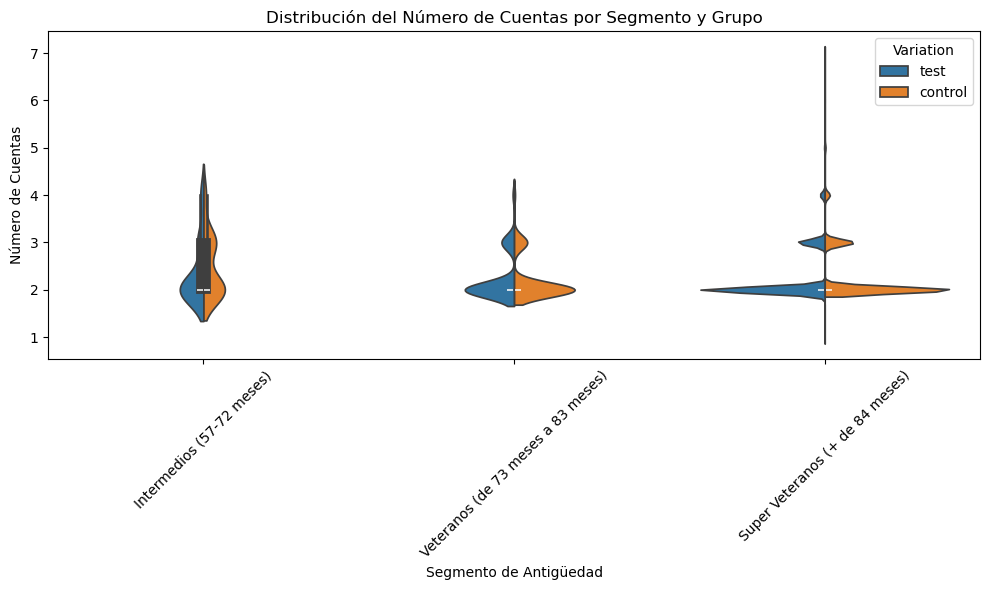

In [36]:
# Gráfico de violín para comparar la distribución del número de cuentas por segmento y grupo
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_demo_expanded, x='tenure_segment', y='num_accts', hue='Variation', split=True)
plt.title('Distribución del Número de Cuentas por Segmento y Grupo')
plt.xlabel('Segmento de Antigüedad')
plt.ylabel('Número de Cuentas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

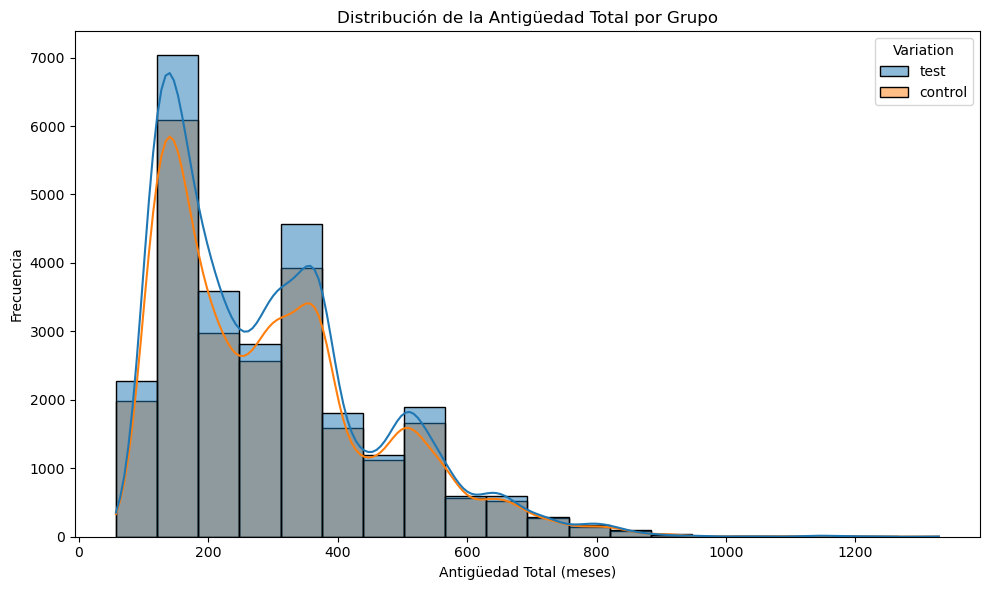

In [37]:
# Gráfico de barras para la distribución de la antigüedad total por grupo
plt.figure(figsize=(10, 6))
sns.histplot(data=df_demo_expanded, x='total_tenure_months', hue='Variation', bins=20, kde=True)
plt.title('Distribución de la Antigüedad Total por Grupo')
plt.xlabel('Antigüedad Total (meses)')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()